In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


df = pd.read_csv('diamonds.csv')
print(df.isna().sum())
df.head()


Shape                    5
Cut                   4303
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4594
Length                  20
Width                   20
Height                  20
Price                    0
Type                     0
Fluorescence          5264
dtype: int64


,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


In [327]:
df.drop_duplicates(inplace=True)
df.isna().sum()

Shape                    5
Cut                   4302
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4593
Length                  20
Width                   20
Height                  20
Price                    0
Type                     0
Fluorescence          5261
dtype: int64

In [328]:
cat_cols = ['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle']
df = df.drop(['Cut', 'Culet', 'Fluorescence'], axis=1)
df = df.interpolate()
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))
df.isna().sum().sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6004\2025316646.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


0

In [329]:
cat_cols = df.select_dtypes('object').columns
def encoder(col):
    encoder = LabelEncoder()
    return encoder.fit_transform(col)

df[cat_cols] = df[cat_cols].apply(lambda col: encoder(col))

<Axes: >

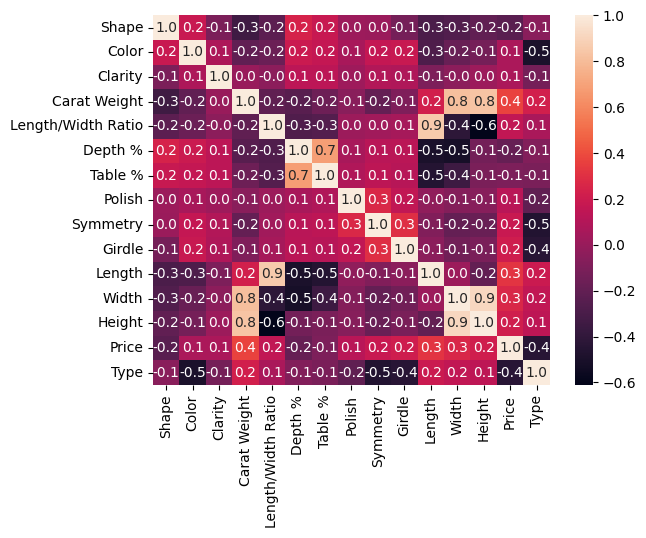

In [330]:
correl = df.corr()
sns.heatmap(correl, annot = True, fmt = '.1f')

In [331]:
df.head()

,Shape,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Length,Width,Height,Price,Type
0,1,2,5,1.84,1.02,65.8,59.0,0,2,7,7.09,6.95,4.57,2640,1
1,6,1,2,1.20,1.65,62.5,58.0,2,2,7,9.64,5.86,3.66,1070,1
2,5,1,2,1.19,1.41,63.1,63.0,2,2,7,8.44,6.00,3.79,1070,1
3,3,0,1,1.00,1.18,61.7,58.0,0,0,13,5.85,6.89,4.25,7110,0
4,8,4,2,1.01,1.35,69.4,66.0,0,2,14,6.80,5.05,3.50,3050,0


In [332]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [333]:
df.head()

,Shape,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Length,Width,Height,Price,Type
0,0.1,0.50,1.0,0.100239,0.012658,0.637540,0.296296,0.0,1.0,0.250000,0.190429,0.241874,0.345455,0.042393,0.5
1,0.6,0.25,0.4,0.023866,0.411392,0.530744,0.259259,1.0,1.0,0.250000,0.444666,0.137667,0.180000,0.001560,0.5
2,0.5,0.25,0.4,0.022673,0.259494,0.550162,0.444444,1.0,1.0,0.250000,0.325025,0.151052,0.203636,0.001560,0.5
3,0.3,0.00,0.2,0.000000,0.113924,0.504854,0.259259,0.0,0.0,0.464286,0.066800,0.236138,0.287273,0.158648,0.0
4,0.8,1.00,0.4,0.001193,0.221519,0.754045,0.555556,0.0,1.0,0.500000,0.161515,0.060229,0.150909,0.053056,0.0


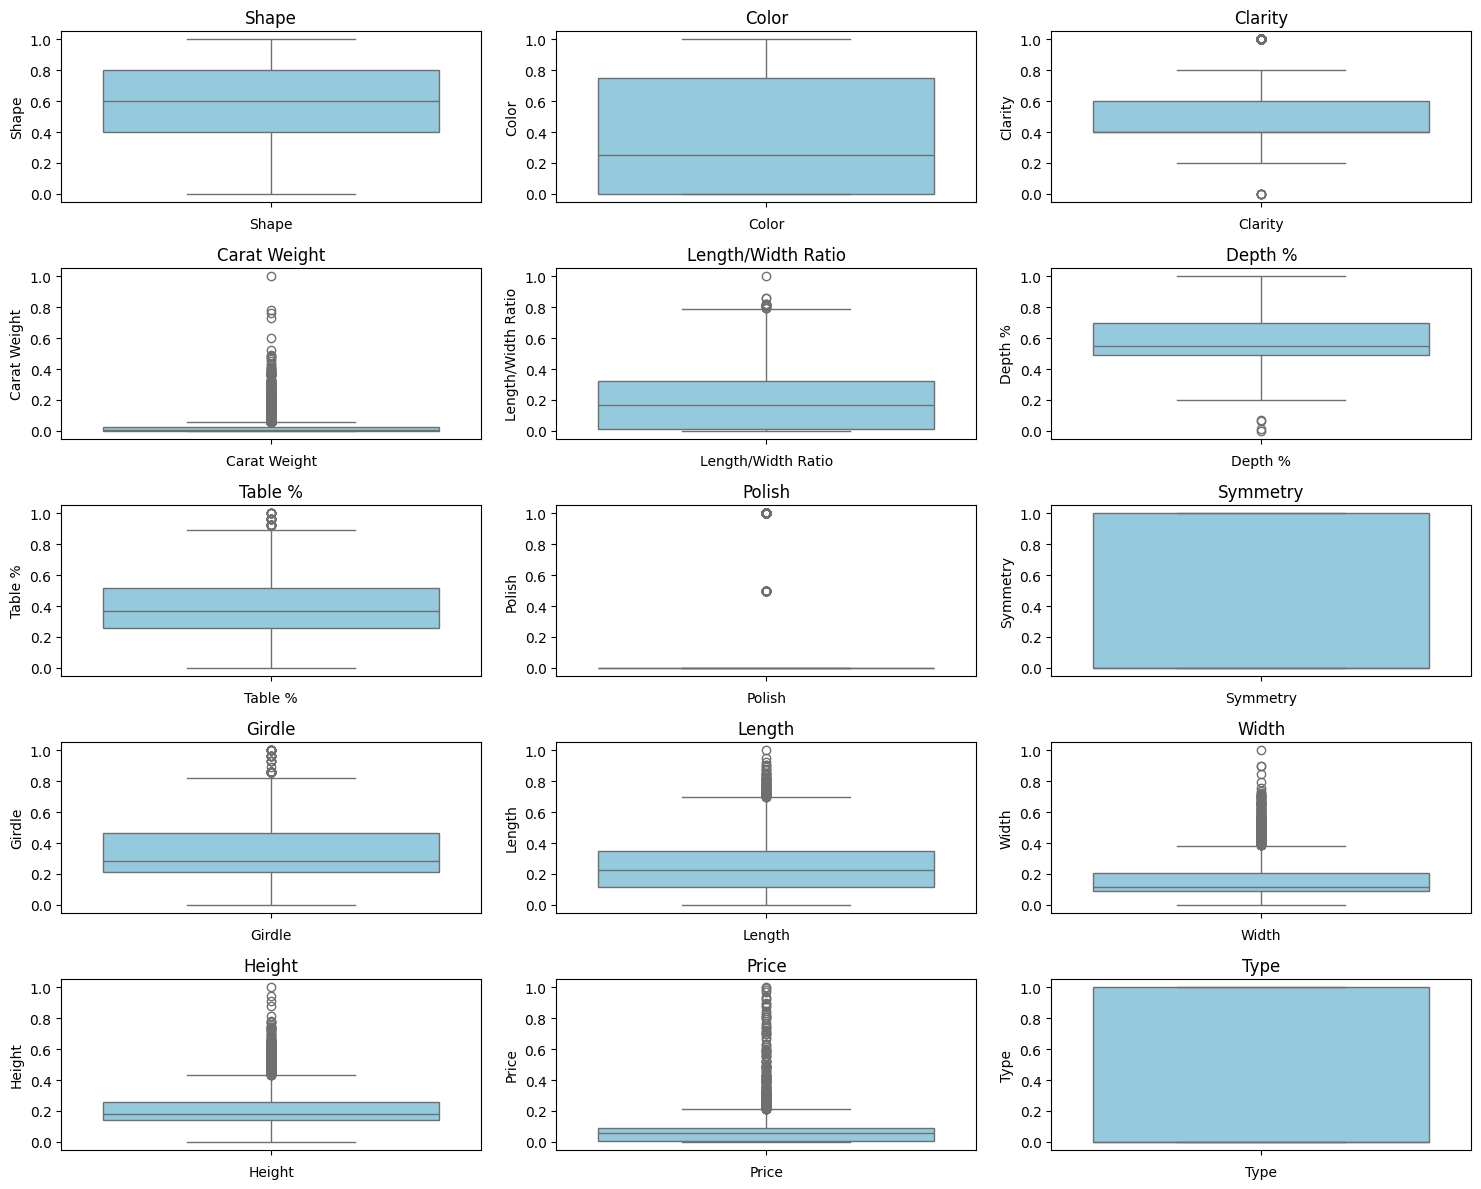

In [334]:
fig, axes = plt.subplots(5, 3, figsize=(15, 12))
axes = axes.flatten()  

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].grid(False)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
        
plt.tight_layout()

In [335]:
c = ['Length', 'Width', 'Height', 'Price', 'Carat Weight']
def cleaning(df):
    df_cleaned_outliers = df.copy()
    for col in c:
        Q1 = df_cleaned_outliers[col].quantile(0.25)  # calc 0.25 point
        Q3 = df_cleaned_outliers[col].quantile(0.75)  # calc 0.75 point
        IQR = Q3 - Q1                             # Rango 
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_cleaned_outliers = df_cleaned_outliers[
            (df_cleaned_outliers[col] >= limite_inferior) &
            (df_cleaned_outliers[col] <= limite_superior)
        ]
    
    return df_cleaned_outliers

df_cleaned_outliers = cleaning(df)

In [336]:
df_cleaned_outliers.shape

(4933, 15)

In [337]:
X, X_trim = df.drop(columns=['Price', 'Type']).values, df_cleaned_outliers.drop(columns=['Price', 'Type']).values
y, y_trim = df['Price'].values, df_cleaned_outliers[['Price']].values

In [338]:
SEED = 43
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)
x_train_trim, x_test_trim, y_train_trim, y_test_trim = train_test_split(X_trim, y_trim, test_size=.2, random_state=SEED)

In [204]:
tf.keras.utils.set_random_seed(SEED)

input_dim = X.shape[1]
output_dim = 1
model = Sequential()
model.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

lr = 0.001
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# Entrenamiento
epochs = 150
batch = 32

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch, validation_split=0.1, verbose=0)

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [205]:
tf.keras.utils.set_random_seed(SEED)

input_dim = X_trim.shape[1]

model_trim = Sequential()
model_trim.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model_trim.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model_trim.add(Dense(output_dim, input_dim=input_dim, activation='linear'))


sgd = SGD(learning_rate=lr)
model_trim.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history_trim = model_trim.fit(x_train_trim, y_train_trim, epochs=epochs, batch_size=batch,  validation_split=0.1, verbose=0)

Text(0.5, 1.0, 'without Outliers')

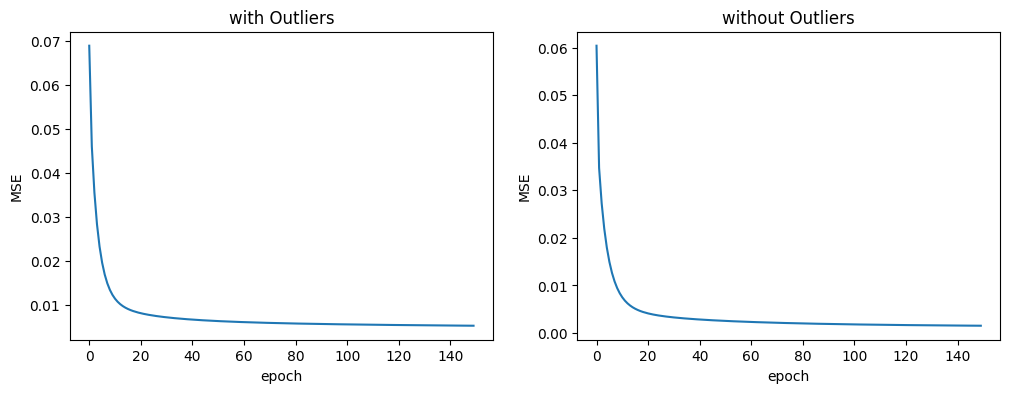

In [206]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('with Outliers')

plt.subplot(1, 2, 2)
plt.plot(history_trim.history['loss'])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('without Outliers')

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
MSE with Outliers: 0.00509
MSE without Outliers: 0.00155
R2 with Outliers: 0.23727
R2 without Outliers: 0.21215


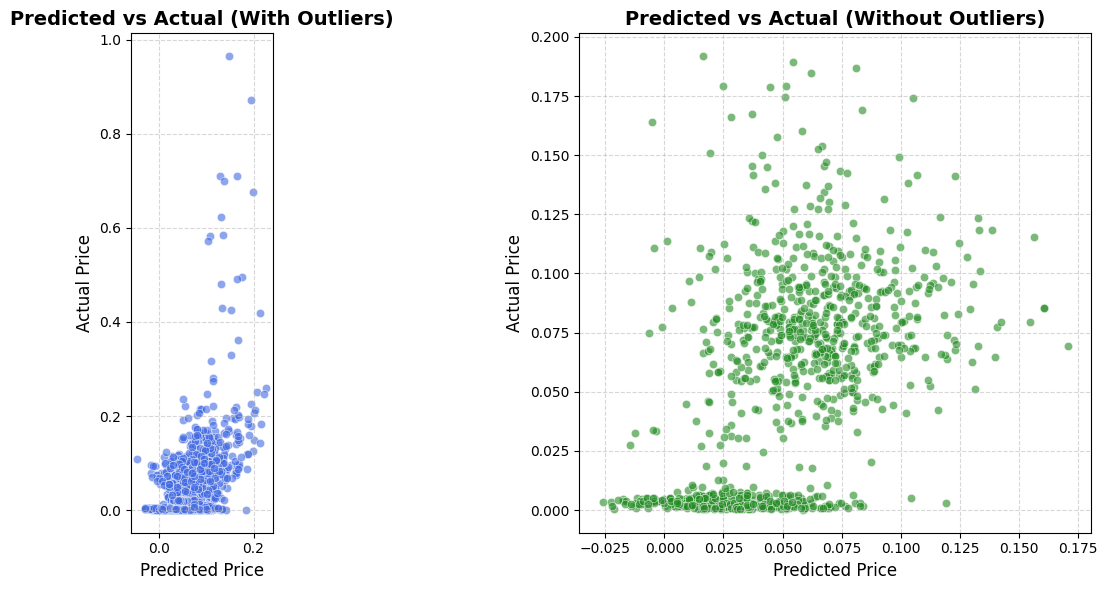

In [228]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np

# Predictions and MSE/R2 calculations
predictions = model.predict(x_test)
predictions_trim = model_trim.predict(x_test_trim)
mse_outliers = mean_squared_error(y_test, predictions)
mse_no_outliers = mean_squared_error(y_test_trim, predictions_trim)
r2_outliers = r2_score(y_test, predictions)
r2_no_outliers = r2_score(y_test_trim, predictions_trim)

# Print MSE and R2 scores
print(f"MSE with Outliers: {mse_outliers:.5f}")
print(f"MSE without Outliers: {mse_no_outliers:.5f}")
print(f"R2 with Outliers: {r2_outliers:.5f}")
print(f"R2 without Outliers: {r2_no_outliers:.5f}")

# Visualization: Scatter plot for predicted vs actual values (for all points)
plt.figure(figsize=(14, 6))

# Plot for data with outliers
plt.subplot(1, 2, 1)
plt.scatter(predictions, y_test, color='royalblue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title("Predicted vs Actual (With Outliers)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Price", fontsize=12)
plt.ylabel("Actual Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Plot for data without outliers
plt.subplot(1, 2, 2)
plt.scatter(predictions_trim, y_test_trim, color='forestgreen', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title("Predicted vs Actual (Without Outliers)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Price", fontsize=12)
plt.ylabel("Actual Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


In [229]:
tf.keras.utils.set_random_seed(SEED)

input_dim = X.shape[1]
output_dim = 1
model2 = Sequential()
model2.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model2.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model2.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model2.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model2.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model2.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

lr = 0.001
sgd = SGD(learning_rate=lr)
model2.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# Entrenamiento
epochs = 150
batch = 32

history = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch, validation_split=0.1, verbose=0)

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tf.keras.utils.set_random_seed(SEED)

input_dim = X_trim.shape[1]

model_trim2 = Sequential()
model_trim2.add(Dense(input_dim, activation='linear'))
model_trim2.add(Dense(64, activation='linear'))
model_trim2.add(Dense(32, activation='linear'))
model_trim2.add(Dense(16, activation='linear'))
model_trim2.add(Dense(8, input_dim=input_dim, activation='linear'))
model_trim2.add(Dense(1, input_dim=input_dim, activation='linear'))


sgd = SGD(learning_rate=lr)
model_trim2.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history_trim = model_trim2.fit(x_train_trim, y_train_trim, epochs=epochs, batch_size=batch,  validation_split=0.1, verbose=0)

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
second MSE with Outliers: 0.00531
second MSE without Outliers: 0.00144
second R2 with Outliers: 0.20558
second R2 without Outliers: 0.26528


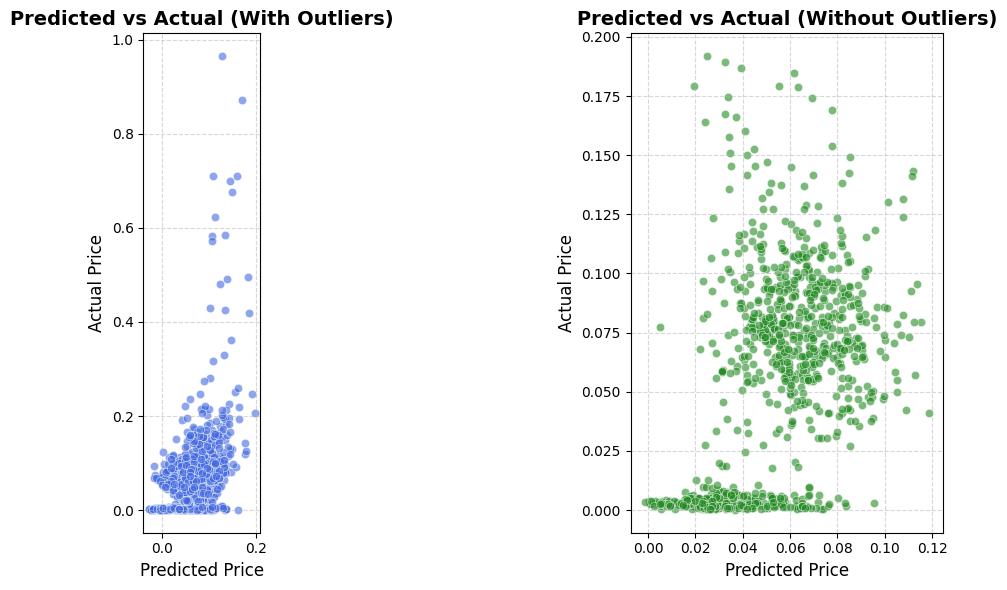

In [259]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np

# Predictions and MSE/R2 calculations
predictions = model2.predict(x_test)
predictions_trim = model_trim2.predict(x_test_trim)
mse_outliers = mean_squared_error(y_test, predictions)
mse_no_outliers = mean_squared_error(y_test_trim, predictions_trim)
r2_outliers = r2_score(y_test, predictions)
r2_no_outliers = r2_score(y_test_trim, predictions_trim)

# Print MSE and R2 scores
print(f"second MSE with Outliers: {mse_outliers:.5f}")
print(f"second MSE without Outliers: {mse_no_outliers:.5f}")
print(f"second R2 with Outliers: {r2_outliers:.5f}")
print(f"second R2 without Outliers: {r2_no_outliers:.5f}")

# Visualization: Scatter plot for predicted vs actual values (for all points)
plt.figure(figsize=(14, 6))

# Plot for data with outliers
plt.subplot(1, 2, 1)
plt.scatter(predictions, y_test, color='royalblue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title("Predicted vs Actual (With Outliers)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Price", fontsize=12)
plt.ylabel("Actual Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Plot for data without outliers
plt.subplot(1, 2, 2)
plt.scatter(predictions_trim, y_test_trim, color='forestgreen', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title("Predicted vs Actual (Without Outliers)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Price", fontsize=12)
plt.ylabel("Actual Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


In [339]:
tf.keras.utils.set_random_seed(SEED)

input_dim = X.shape[1]
output_dim = 1
model3 = Sequential()
model3.add(Dense(input_dim, input_dim=input_dim, activation='sigmoid'))
model3.add(Dense(input_dim, input_dim=input_dim, activation='sigmoid'))
model3.add(Dense(input_dim, input_dim=input_dim, activation='sigmoid'))
model3.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model3.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model3.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

lr = 0.001
sgd = SGD(learning_rate=lr)
model3.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# Entrenamiento
epochs = 150
batch = 32

history = model3.fit(x_train, y_train, epochs=epochs, batch_size=batch, validation_split=0.1, verbose=0)

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [340]:
tf.keras.utils.set_random_seed(SEED)

input_dim = X_trim.shape[1]

model_trim3 = Sequential()
model_trim3.add(Dense(input_dim, input_dim=input_dim, activation='sigmoid'))
model_trim3.add(Dense(input_dim, input_dim=input_dim, activation='sigmoid'))
model_trim3.add(Dense(input_dim, input_dim=input_dim, activation='sigmoid'))
model_trim3.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model_trim3.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
model_trim3.add(Dense(output_dim, input_dim=input_dim, activation='linear'))


sgd = SGD(learning_rate=lr)
model_trim3.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history_trim = model_trim3.fit(x_train_trim, y_train_trim, epochs=epochs, batch_size=batch,  validation_split=0.1, verbose=0)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
second MSE with Outliers: 0.00668
second MSE without Outliers: 0.00196
second R2 with Outliers: -0.00039
second R2 without Outliers: 0.00035


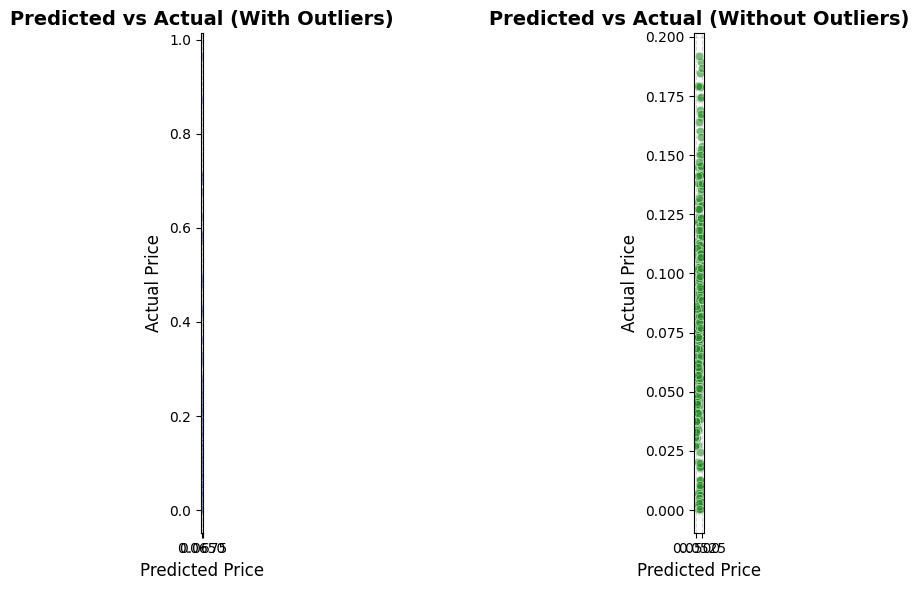

In [341]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np

# Predictions and MSE/R2 calculations
predictions = model3.predict(x_test)
predictions_trim = model_trim3.predict(x_test_trim)
mse_outliers = mean_squared_error(y_test, predictions)
mse_no_outliers = mean_squared_error(y_test_trim, predictions_trim)
r2_outliers = r2_score(y_test, predictions)
r2_no_outliers = r2_score(y_test_trim, predictions_trim)

# Print MSE and R2 scores
print(f"second MSE with Outliers: {mse_outliers:.5f}")
print(f"second MSE without Outliers: {mse_no_outliers:.5f}")
print(f"second R2 with Outliers: {r2_outliers:.5f}")
print(f"second R2 without Outliers: {r2_no_outliers:.5f}")

# Visualization: Scatter plot for predicted vs actual values (for all points)
plt.figure(figsize=(14, 6))

# Plot for data with outliers
plt.subplot(1, 2, 1)
plt.scatter(predictions, y_test, color='royalblue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title("Predicted vs Actual (With Outliers)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Price", fontsize=12)
plt.ylabel("Actual Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Plot for data without outliers
plt.subplot(1, 2, 2)
plt.scatter(predictions_trim, y_test_trim, color='forestgreen', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title("Predicted vs Actual (Without Outliers)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Price", fontsize=12)
plt.ylabel("Actual Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


In [246]:
#adding RBF
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, num_centers):
        super(RBFLayer, self).__init__()
        self.num_centers = num_centers

    def build(self, input_shape):
        self.centers = self.add_weight(shape=(self.num_centers, input_shape[1]),
                                       initializer='random_normal',
                                       trainable=True)
        self.widths = self.add_weight(shape=(self.num_centers,),
                                      initializer='ones',
                                      trainable=True)
    
    def call(self, inputs):
        diff = tf.expand_dims(inputs, 1) - self.centers
        squared_distances = tf.reduce_sum(diff ** 2, axis=-1)
        return tf.exp(-squared_distances / (2 * self.widths ** 2))


In [271]:
input_dim = X.shape[1]
output_dim = 1
num_centers = 10  

model_rbf = Sequential()
model_rbf.add(RBFLayer(num_centers=num_centers))
model_rbf.add(Dense(64, activation='linear'))
model_rbf.add(Dense(32, activation='linear'))
model_rbf.add(Dense(16, activation='linear'))
model_rbf.add(Dense(8, activation='linear'))  # Adding another Dense layer with linear activation
model_rbf.add(Dense(1, activation='linear'))  # Output layer

lr = 0.001
sgd = SGD(learning_rate=lr)
model_rbf.compile(optimizer=sgd, loss='mse', metrics=['mse'])

epochs = 150
batch = 32
history_rbf = model_rbf.fit(x_train_trim, y_train_trim, epochs=epochs, batch_size=batch, validation_split=0.1, verbose=0)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE for RBF model: 0.00175
R2 Score for RBF model: 0.10818


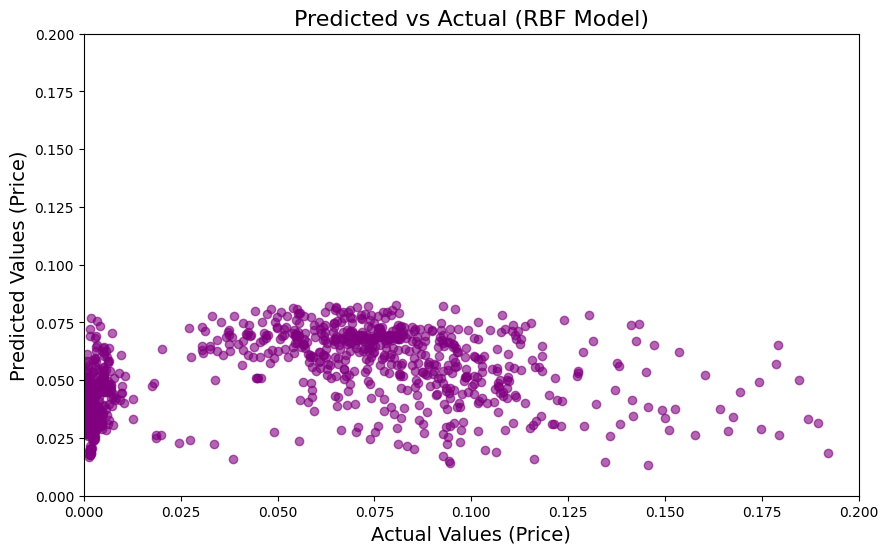

In [272]:
predictions_rbf = model_rbf.predict(x_test_trim)

# Calculate MSE and R2 score for the model_rbf on x_test_trim data
mse_rbf = mean_squared_error(y_test_trim, predictions_rbf)
r2_rbf = r2_score(y_test_trim, predictions_rbf)

# Print the results
print(f"MSE for RBF model: {mse_rbf:.5f}")
print(f"R2 Score for RBF model: {r2_rbf:.5f}")

# Visualizing the results: Predicted vs Actual (RBF model)
plt.figure(figsize=(10,6))
plt.scatter(y_test_trim, predictions_rbf, color='purple', alpha=0.6)
plt.title("Predicted vs Actual (RBF Model)", fontsize=16)
plt.xlabel("Actual Values (Price)", fontsize=14)
plt.ylabel("Predicted Values (Price)", fontsize=14)

# Set x and y axis limits from 0 to 0.2
plt.xlim(0, 0.2)
plt.ylim(0, 0.2)

plt.show()


In [274]:
input_dim = X.shape[1]
output_dim = 1
num_centers = 100

model_rbf2 = Sequential()
model_rbf2.add(RBFLayer(num_centers=num_centers))
model_rbf2.add(Dense(64, activation='linear'))
model_rbf2.add(Dense(32, activation='linear'))
model_rbf2.add(Dense(16, activation='linear'))
model_rbf2.add(Dense(8, activation='linear'))  # Adding another Dense layer with linear activation
model_rbf2.add(Dense(1, activation='linear'))  # Output layer

lr = 0.001
sgd = SGD(learning_rate=lr)
model_rbf2.compile(optimizer=sgd, loss='mse', metrics=['mse'])

epochs = 150
batch = 32
history_rbf2 = model_rbf2.fit(x_train_trim, y_train_trim, epochs=epochs, batch_size=batch, validation_split=0.1, verbose=0)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE for RBF model: 0.00144
R2 Score for RBF model: 0.26733


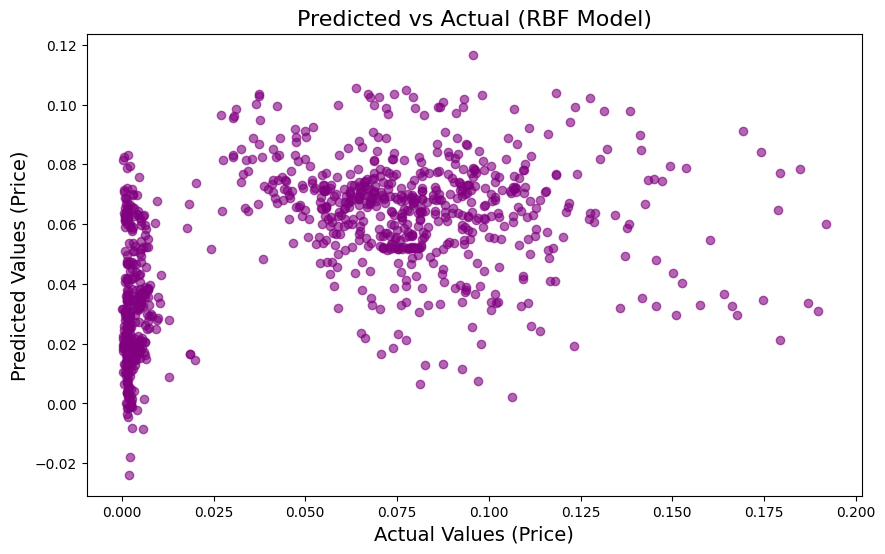

In [275]:
predictions_rbf = model_rbf2.predict(x_test_trim)

# Calculate MSE and R2 score for the model_rbf on x_test_trim data
mse_rbf = mean_squared_error(y_test_trim, predictions_rbf)
r2_rbf = r2_score(y_test_trim, predictions_rbf)

# Print the results
print(f"MSE for RBF model: {mse_rbf:.5f}")
print(f"R2 Score for RBF model: {r2_rbf:.5f}")

# Visualizing the results: Predicted vs Actual (RBF model)
plt.figure(figsize=(10,6))
plt.scatter(y_test_trim, predictions_rbf, color='purple', alpha=0.6)
plt.title("Predicted vs Actual (RBF Model)", fontsize=16)
plt.xlabel("Actual Values (Price)", fontsize=14)
plt.ylabel("Predicted Values (Price)", fontsize=14)
plt.show()

In [279]:
input_dim = X.shape[1]
output_dim = 1
num_centers = 800

model_rbf3 = Sequential()
model_rbf3.add(RBFLayer(num_centers=num_centers))
model_rbf3.add(Dense(64, activation='linear'))
model_rbf3.add(Dense(32, activation='linear'))
model_rbf3.add(Dense(16, activation='linear'))
model_rbf3.add(Dense(8, activation='linear'))  # Adding another Dense layer with linear activation
model_rbf3.add(Dense(1, activation='linear'))  # Output layer

lr = 0.001
sgd = SGD(learning_rate=lr)
model_rbf3.compile(optimizer=sgd, loss='mse', metrics=['mse'])

epochs = 150
batch = 32
history_rbf3 = model_rbf3.fit(x_train_trim, y_train_trim, epochs=epochs, batch_size=batch, validation_split=0.1, verbose=0)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE for RBF model: 0.00138
R2 Score for RBF model: 0.29592


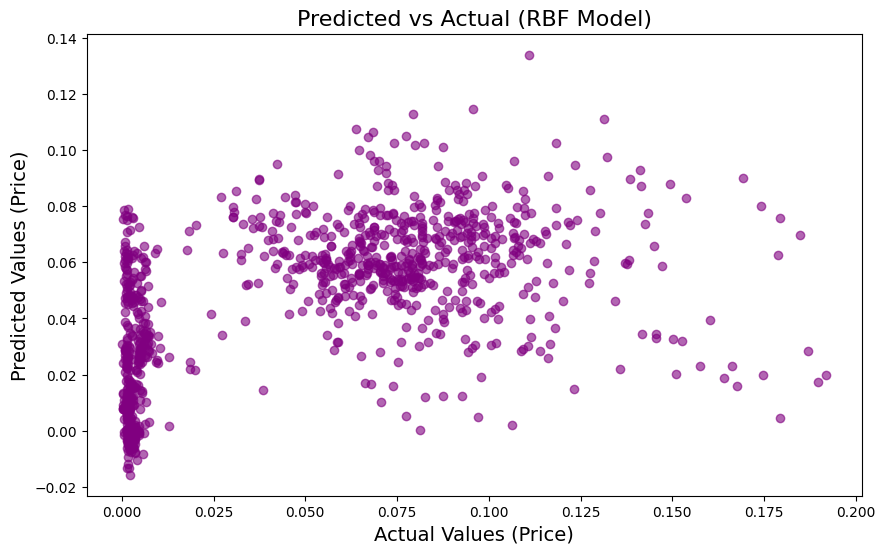

In [288]:
predictions_rbf = model_rbf3.predict(x_test_trim)

# Calculate MSE and R2 score for the model_rbf on x_test_trim data
mse_rbf = mean_squared_error(y_test_trim, predictions_rbf)
r2_rbf = r2_score(y_test_trim, predictions_rbf)

# Print the results
print(f"MSE for RBF model: {mse_rbf:.5f}")
print(f"R2 Score for RBF model: {r2_rbf:.5f}")

# Visualizing the results: Predicted vs Actual (RBF model)
plt.figure(figsize=(10,6))
plt.scatter(y_test_trim, predictions_rbf, color='purple', alpha=0.6)
plt.title("Predicted vs Actual (RBF Model)", fontsize=16)
plt.xlabel("Actual Values (Price)", fontsize=14)
plt.ylabel("Predicted Values (Price)", fontsize=14)
plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


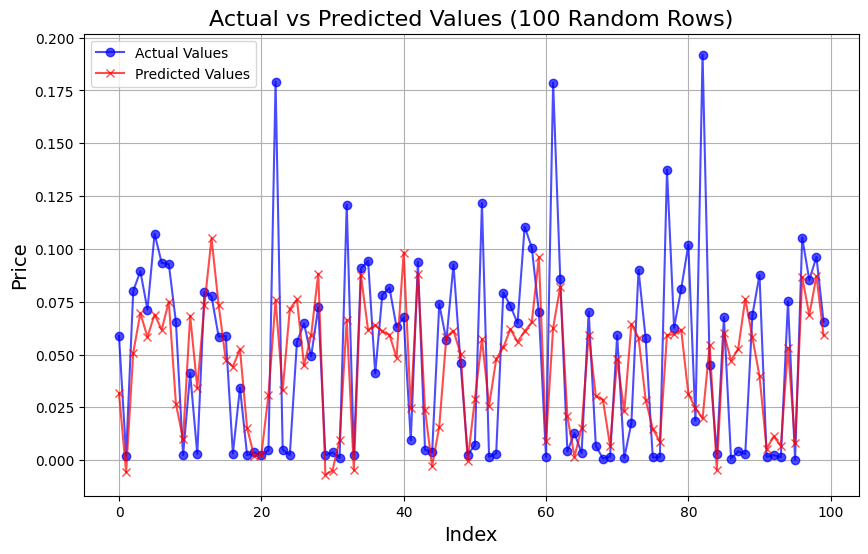

In [294]:
predictions_rbf = model_rbf3.predict(x_test_trim)
indices = np.random.choice(len(y_test_trim), size=100, replace=False)

actual_values = y_test_trim[indices]
predicted_values = predictions_rbf[indices].flatten()

# Visualizing the results using a line graph
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", color='blue', marker='o', linestyle='-', alpha=0.7)
plt.plot(predicted_values, label="Predicted Values", color='red', marker='x', linestyle='-', alpha=0.7)
plt.title("Actual vs Predicted Values (100 Random Rows)", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [433]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
mlp = MLPRegressor(hidden_layer_sizes=(100, 200, 100), activation='relu', solver='adam', max_iter=5000, random_state=43)
mlp.fit(x_train_trim, y_train_trim)
y_pred = mlp.predict(x_test_trim)
mse = mean_squared_error(y_test_trim, y_pred)
r2 = r2_score(y_test_trim, y_pred)
print(f"Mean Squared Error: {mse:.5f}")
print(f"R2 Score: {r2:.5f}")

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.00085
R2 Score: 0.56902


MSE for RBF model: 0.00085
R2 Score for RBF model: 0.56902


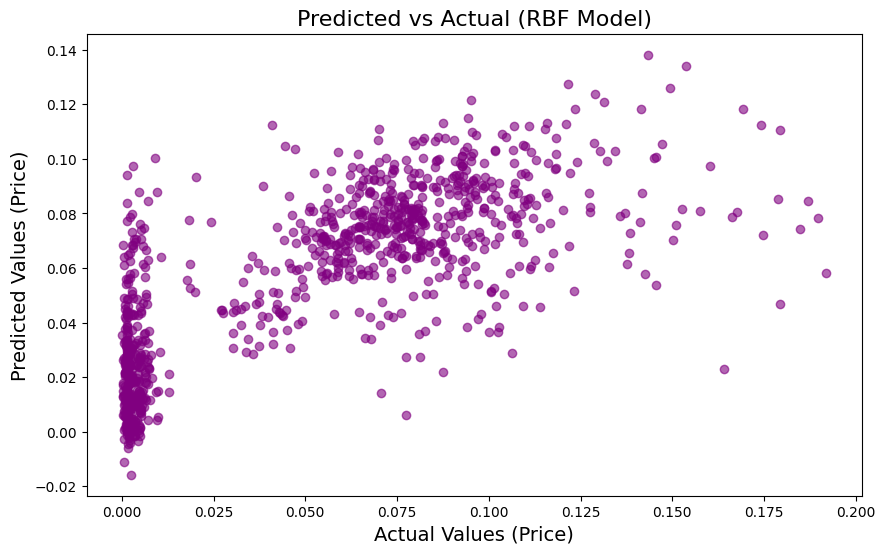

In [434]:
predictions_rbf = y_pred

# Calculate MSE and R2 score for the model_rbf on x_test_trim data
mse_rbf = mean_squared_error(y_test_trim, predictions_rbf)
r2_rbf = r2_score(y_test_trim, predictions_rbf)

# Print the results
print(f"MSE for RBF model: {mse_rbf:.5f}")
print(f"R2 Score for RBF model: {r2_rbf:.5f}")

# Visualizing the results: Predicted vs Actual (RBF model)
plt.figure(figsize=(10,6))
plt.scatter(y_test_trim, predictions_rbf, color='purple', alpha=0.6)
plt.title("Predicted vs Actual (RBF Model)", fontsize=16)
plt.xlabel("Actual Values (Price)", fontsize=14)
plt.ylabel("Predicted Values (Price)", fontsize=14)
plt.show()

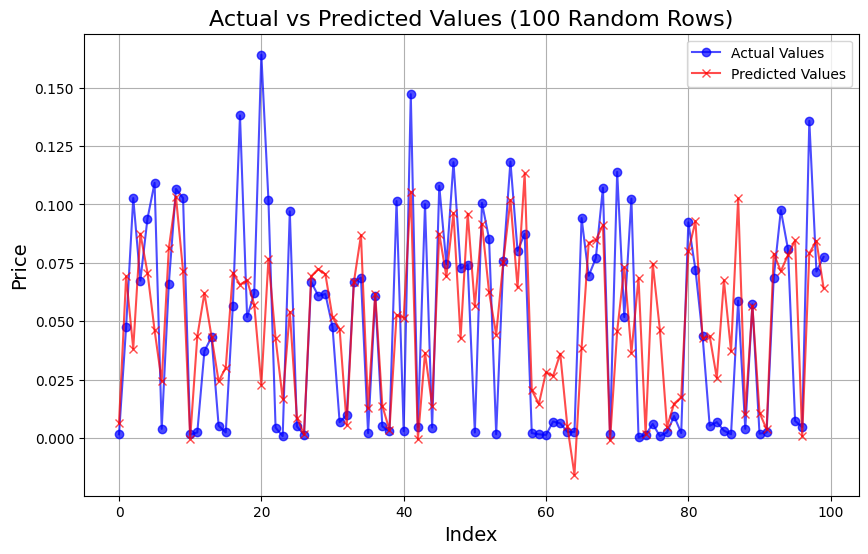

In [435]:
indices = np.random.choice(len(y_test_trim), size=100, replace=False)

actual_values = y_test_trim[indices]
predicted_values = predictions_rbf[indices].flatten()

# Visualizing the results using a line graph
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", color='blue', marker='o', linestyle='-', alpha=0.7)
plt.plot(predicted_values, label="Predicted Values", color='red', marker='x', linestyle='-', alpha=0.7)
plt.title("Actual vs Predicted Values (100 Random Rows)", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [443]:
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create an RBF feature transformer
rbf_feature = RBFSampler(n_components=800, random_state=43)

# Create a pipeline that first applies RBF transformation and then trains an MLP
mlp_rbf = Pipeline([
    ('rbf_transform', rbf_feature),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 200, 200, 100), activation='relu', solver='adam', max_iter=10000, random_state=43))
])

# Train the model
mlp_rbf.fit(x_train_trim, y_train_trim)

# Predict and evaluate
y_pred = mlp_rbf.predict(x_test_trim)
mse = mean_squared_error(y_test_trim, y_pred)
r2 = r2_score(y_test_trim, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R2 Score: {r2:.5f}")


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.00068
R2 Score: 0.65234


MSE for RBF model: 0.00068
R2 Score for RBF model: 0.65234


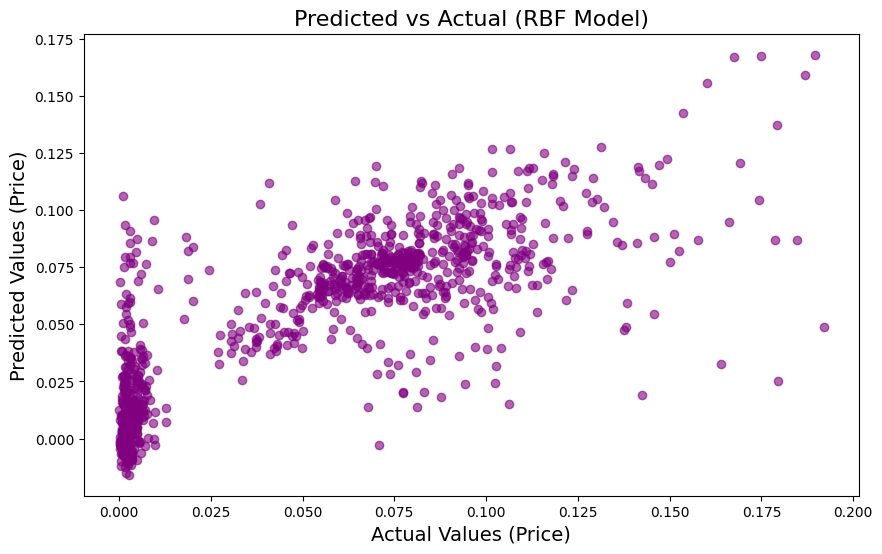

In [444]:
predictions_rbf = y_pred

# Calculate MSE and R2 score for the model_rbf on x_test_trim data
mse_rbf = mean_squared_error(y_test_trim, predictions_rbf)
r2_rbf = r2_score(y_test_trim, predictions_rbf)

# Print the results
print(f"MSE for RBF model: {mse_rbf:.5f}")
print(f"R2 Score for RBF model: {r2_rbf:.5f}")

# Visualizing the results: Predicted vs Actual (RBF model)
plt.figure(figsize=(10,6))
plt.scatter(y_test_trim, predictions_rbf, color='purple', alpha=0.6)
plt.title("Predicted vs Actual (RBF Model)", fontsize=16)
plt.xlabel("Actual Values (Price)", fontsize=14)
plt.ylabel("Predicted Values (Price)", fontsize=14)
plt.show()

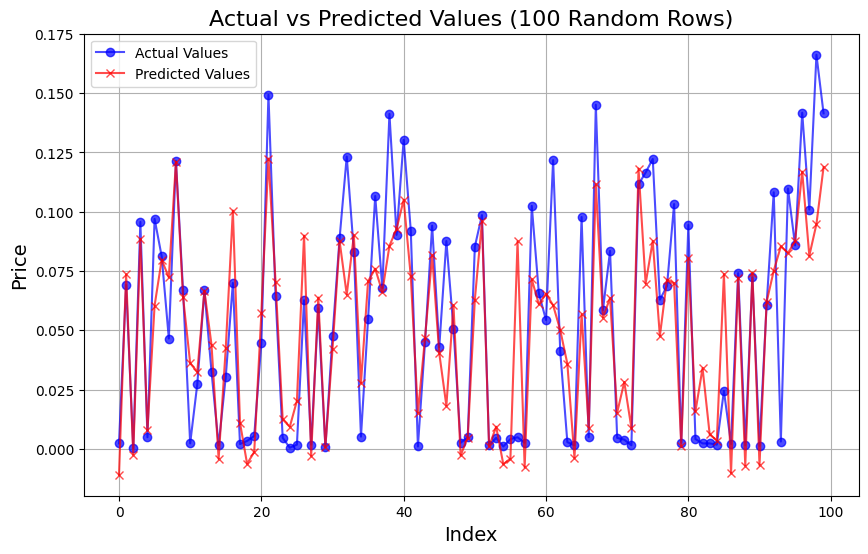

In [445]:
indices = np.random.choice(len(y_test_trim), size=100, replace=False)

actual_values = y_test_trim[indices]
predicted_values = predictions_rbf[indices].flatten()

# Visualizing the results using a line graph
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", color='blue', marker='o', linestyle='-', alpha=0.7)
plt.plot(predicted_values, label="Predicted Values", color='red', marker='x', linestyle='-', alpha=0.7)
plt.title("Actual vs Predicted Values (100 Random Rows)", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [447]:
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

rbf_feature = RBFSampler(n_components=800, random_state=43)

mlp_rbf = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=True)),
    ('rbf_transform', rbf_feature),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 200, 200, 100), activation='relu', solver='adam', max_iter=7000, random_state=43))
])

mlp_rbf.fit(x_train_trim, y_train_trim)

y_pred = mlp_rbf.predict(x_test_trim)
mse = mean_squared_error(y_test_trim, y_pred)
r2 = r2_score(y_test_trim, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R2 Score: {r2:.5f}")


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.00066
R2 Score: 0.66187


MSE for RBF model: 0.00066
R2 Score for RBF model: 0.66187


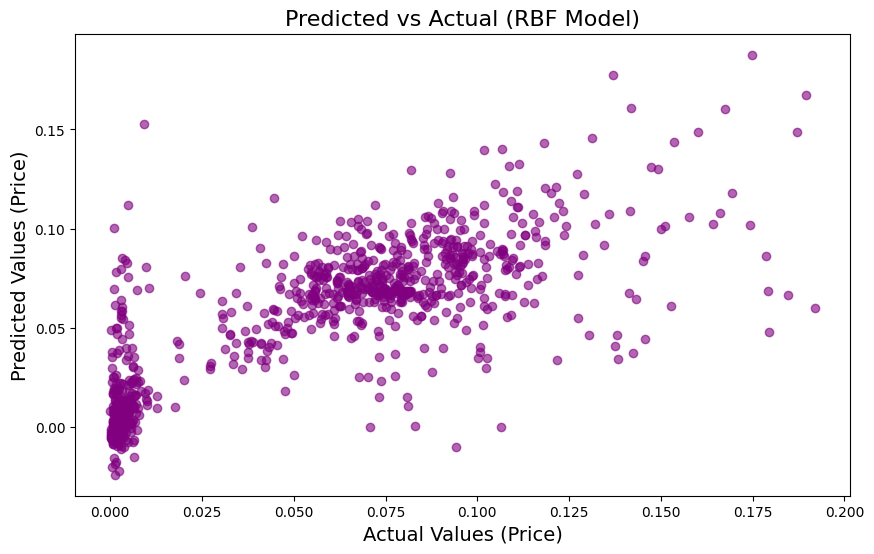

In [448]:
predictions_rbf = y_pred

# Calculate MSE and R2 score for the model_rbf on x_test_trim data
mse_rbf = mean_squared_error(y_test_trim, predictions_rbf)
r2_rbf = r2_score(y_test_trim, predictions_rbf)

# Print the results
print(f"MSE for RBF model: {mse_rbf:.5f}")
print(f"R2 Score for RBF model: {r2_rbf:.5f}")

# Visualizing the results: Predicted vs Actual (RBF model)
plt.figure(figsize=(10,6))
plt.scatter(y_test_trim, predictions_rbf, color='purple', alpha=0.6)
plt.title("Predicted vs Actual (RBF Model)", fontsize=16)
plt.xlabel("Actual Values (Price)", fontsize=14)
plt.ylabel("Predicted Values (Price)", fontsize=14)
plt.show()

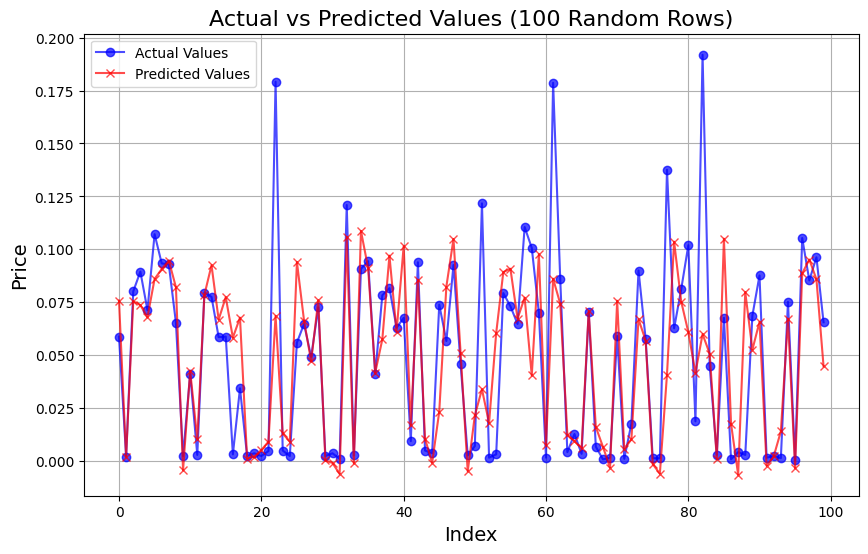

In [449]:
indices = np.random.choice(len(y_test_trim), size=100, replace=False)

actual_values = y_test_trim[indices]
predicted_values = predictions_rbf[indices].flatten()

# Visualizing the results using a line graph
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", color='blue', marker='o', linestyle='-', alpha=0.7)
plt.plot(predicted_values, label="Predicted Values", color='red', marker='x', linestyle='-', alpha=0.7)
plt.title("Actual vs Predicted Values (100 Random Rows)", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [455]:
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=True)),
    ('select', SelectKBest(f_regression)),
    ('rbf', RBFSampler(random_state=43)),
    ('mlp', MLPRegressor(random_state=43, solver='adam', max_iter=7000))
])

params = {
    'poly__degree': [1, 2, 3],
    'select__k': [5, 10, 20],
    'rbf__n_components': [400, 800, 1200],
    'mlp__hidden_layer_sizes': [(100, 200, 100), (100, 200, 200, 100)],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__alpha': [0.0001, 0.001]
}

grid = GridSearchCV(pipeline, params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train_trim, y_train_trim)

print("Best parameters:", grid.best_params_)
print("Best CV R2:", grid.best_score_)

y_pred = grid.predict(x_test_trim)
mse = mean_squared_error(y_test_trim, y_pred)
r2 = r2_score(y_test_trim, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R2 Score: {r2:.5f}")


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=14. All the features will be returned.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (100, 200, 100), 'mlp__learning_rate_init': 0.001, 'poly__degree': 1, 'rbf__n_components': 800, 'select__k': 20}
Best CV R2: 0.6285965473447244
Mean Squared Error: 0.00064
R2 Score: 0.67316


MSE for RBF model: 0.00064
R2 Score for RBF model: 0.67316


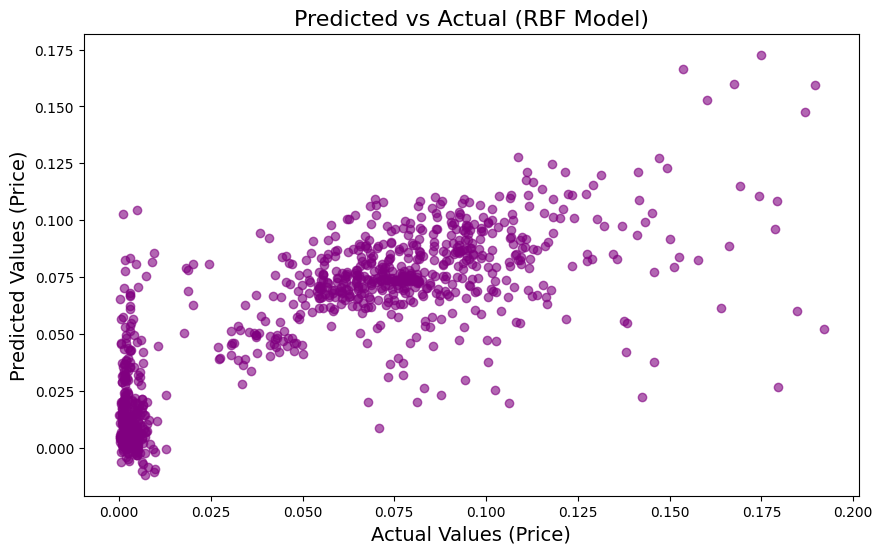

In [456]:
predictions_rbf = y_pred

# Calculate MSE and R2 score for the model_rbf on x_test_trim data
mse_rbf = mean_squared_error(y_test_trim, predictions_rbf)
r2_rbf = r2_score(y_test_trim, predictions_rbf)

# Print the results
print(f"MSE for RBF model: {mse_rbf:.5f}")
print(f"R2 Score for RBF model: {r2_rbf:.5f}")

# Visualizing the results: Predicted vs Actual (RBF model)
plt.figure(figsize=(10,6))
plt.scatter(y_test_trim, predictions_rbf, color='purple', alpha=0.6)
plt.title("Predicted vs Actual (RBF Model)", fontsize=16)
plt.xlabel("Actual Values (Price)", fontsize=14)
plt.ylabel("Predicted Values (Price)", fontsize=14)
plt.show()

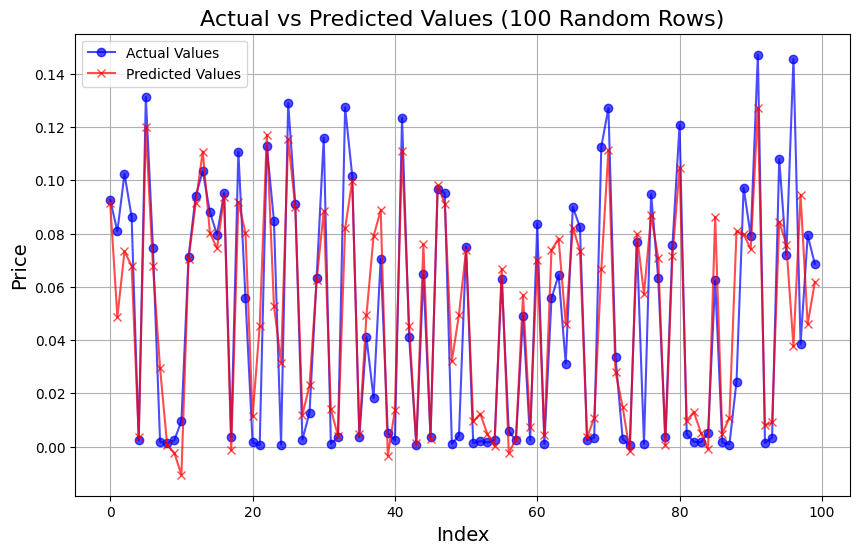

In [457]:
indices = np.random.choice(len(y_test_trim), size=100, replace=False)

actual_values = y_test_trim[indices]
predicted_values = predictions_rbf[indices].flatten()

# Visualizing the results using a line graph
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", color='blue', marker='o', linestyle='-', alpha=0.7)
plt.plot(predicted_values, label="Predicted Values", color='red', marker='x', linestyle='-', alpha=0.7)
plt.title("Actual vs Predicted Values (100 Random Rows)", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [301]:
#classification
X, X_trim = df.drop(columns=['Price', 'Type']).values, df_cleaned_outliers.drop(columns=['Price', 'Type']).values
y, y_trim = df['Type'].values, df_cleaned_outliers[['Type']].values
X_trim = X_trim * 2
y_trim = y_trim * 2
SEED = 43
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)
x_train_trim, x_test_trim, y_train_trim, y_test_trim = train_test_split(X_trim, y_trim, test_size=.2, random_state=SEED)

In [302]:
y_train_trim[1:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.]])

In [311]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
model = SVC(kernel='rbf', random_state=42)
model.fit(x_train_trim, y_train_trim)

# Predict on the test set
y_pred = model.predict(x_test_trim)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_trim, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_trim, y_pred))

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8531

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       611
         1.0       0.81      0.20      0.32       112
         2.0       0.73      0.94      0.82       264

    accuracy                           0.85       987
   macro avg       0.82      0.69      0.69       987
weighted avg       0.86      0.85      0.83       987



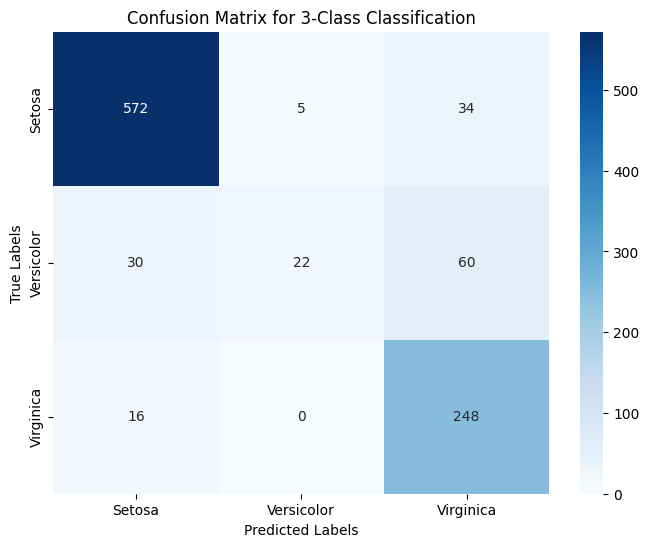

In [312]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_trim, y_pred)

# Plot the confusion matrix as a heatmap (3x3 matrix for 3 classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix for 3-Class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [323]:
X, X_trim = df.drop(columns=['Price', 'Type']).values, df_cleaned_outliers.drop(columns=['Price', 'Type']).values
y, y_trim = df['Price'].values, df_cleaned_outliers[['Price']].values
export_df = pd.DataFrame(X_trim)
export_df['target'] = y_trim
export_df.to_csv('matlabin.csv', index=False)

In [325]:
input_dim

13